In [19]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [54]:
df = pd.read_csv('AAPL.csv')
values = np.array(df['Close'])
length = len(values)
size = 20

In [55]:
x_train, y_train, x_test, y_test = [], [], [], []
for i in range(size, (length * 4)//5, 1):
    x_train.append(values[i-size:i])
    y_train.append(values[i+1])

for i in range((length * 4)//5, length-1, 1):
    x_test.append(values[i-size:i])
    y_test.append(values[i+1])

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train.shape, y_train.shape

((985, 20), (985,))

In [69]:

model = Sequential([
    Input(shape=(size,)),  # Input layer
    Dense(64, activation='relu'),  # First hidden layer with ReLU
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(1)  # Output layer (predicting a single value)
])

In [74]:
from tensorflow.keras.losses import Huber

model.compile(optimizer='adam', loss=Huber(delta=1.0))
history = model.fit(x_train, y_train, epochs = 50, batch_size = 32, validation_split = 0.1)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 5.9399 - val_loss: 3.4361
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.6066 - val_loss: 3.3661
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.6174 - val_loss: 8.4282
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.7072 - val_loss: 4.7799
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.6269 - val_loss: 3.3273
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1589 - val_loss: 3.2252
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5710 - val_loss: 7.4108
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.5746 - val_loss: 3.2257
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.4855 - val_loss: 3.1090
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.1871 - val_loss: 3.1633
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3922 - val_loss: 3.5307
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3094 -

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


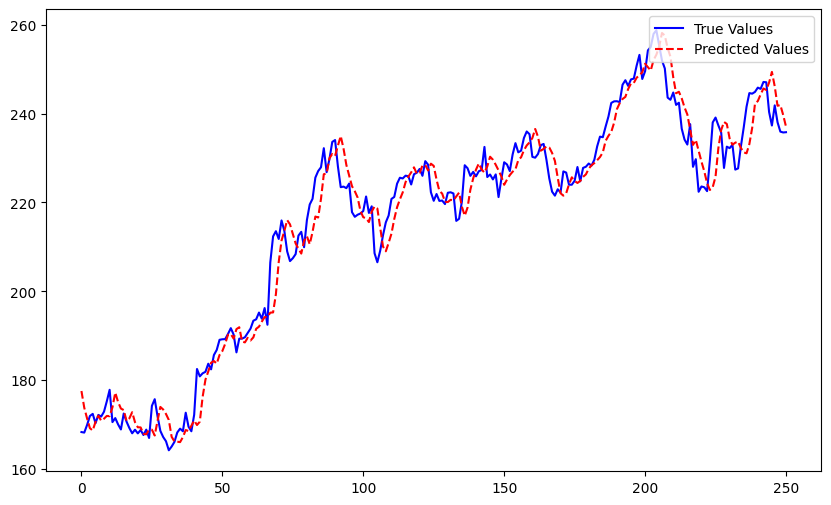

In [75]:
y_pred = model.predict(x_test)

plt.figure(figsize=(10, 6))

plt.plot(y_test, label='True Values', color='blue')

plt.plot(y_pred, label='Predicted Values', color='red', linestyle='--')

plt.legend(loc='upper right')

plt.show()

In [76]:
# Number of future predictions
num_predictions = 20

# Start with the last window in x_test
current_window = x_test[-1].reshape(1, size)
future_predictions = []

for _ in range(num_predictions):
    # Predict the next value
    next_value = model.predict(current_window)  # Extract scalar value

    # Store the prediction
    future_predictions.append(next_value)

    # Shift the window: Remove the first element and add the predicted value at the end
    current_window = np.roll(current_window, -1)  # Shift all values left
    current_window[0, -1] = next_value  # Add new predicted value

# Create time indices for plotting
future_x_indices = np.arange(len(y_test), len(y_test) + num_predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


/tmp/ipykernel_20962/3564166004.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_window[0, -1] = next_value  # Add new predicted value


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


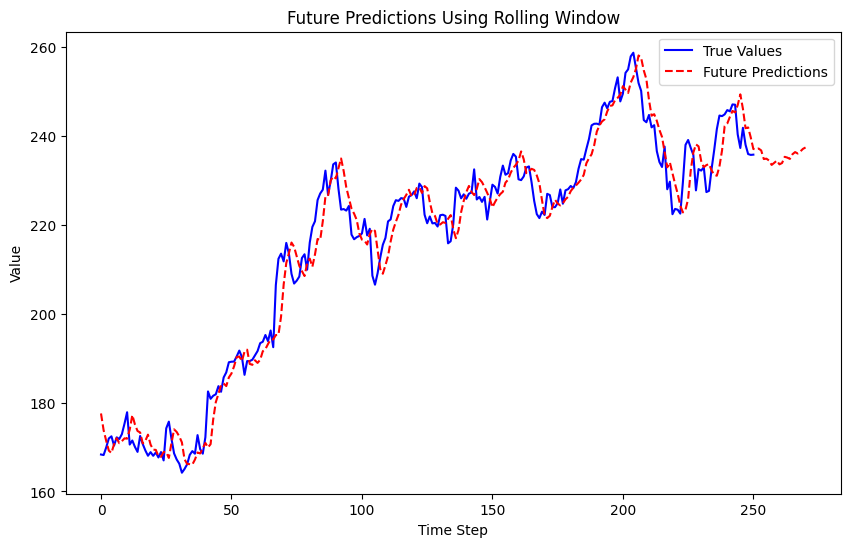

In [77]:
plt.figure(figsize=(10, 6))


# Plot true values from y_test
plt.plot(y_test, label="True Values", color="blue")

# Plot predicted future values
plt.plot(np.concatenate((y_pred.squeeze(), np.array(future_predictions).squeeze())), label="Future Predictions", color="red", linestyle="--")

plt.xlabel("Time Step")
plt.ylabel("Value")
plt.title("Future Predictions Using Rolling Window")
plt.legend(loc="upper right")
plt.show()